In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab_9_simulation.ipynb")

# Iterative systems part II 

We'll add two things here:
 - Stop when the "ball" drops below the y = 0 line
 - "Bouncing" off of the top and side walls

See Slides for how to handle crossing a wall (naive versus smart fix)

In [2]:
# The usual imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# These commands will force JN to actually re-load the external file when you re-execute the import command
%load_ext autoreload
%autoreload 2

In [4]:
# Do the import of your pinball routines
# 
from pinball_routines import acceleration_due_to_gravity, compute_next_step, outside_top_wall, outside_left_wall, outside_right_wall

# Stop when at bottom

Switch from going a set number of time steps to going until the ball passes through **y = 0**

TODO: New simulation routine: set it up to return when passing through floor

Ignore walls - we'll handle that in the next problem

Keep the pose just after the ball passes through **y=0** - so the second to last pose should be above, the last below

In [5]:
def simulate_pinball(starting_state, top_wall=7, left_wall=-3, right_wall=3, delta_t=0.1):
    """ Call compute one time step multiple times and store it in a numpy array
    @param starting_state - the starting positino, velocity, acceleration
    @param delta_t - the time step to use. Define a default t value that you've determined works well
    @return position values as a 2xtimesteps numpy array
    """

    # The returned array.We do not know the size, so do not pre-allocate
    ret_pose_all = []

    # TODO (question 1) Use a while loop instead of the for loop
    # Set the stopping criteria based on current state y value
    current_state = starting_state
    ret_pose_all.append(current_state[0, :])
    while current_state[0, 1] >= 0:
        current_state = compute_next_step(current_state, delta_t)

    # TODO (question 2)
    # Add in each wall/top at a time (there are test routines for reach below)
    # Use if statements, not if-else statements, because it is possible to be outside of the top and side wall...
        if current_state[0, 1] > top_wall:
            current_state[1, 1] = -current_state[1, 1]
            current_state[0, 1] = top_wall

        if current_state[0, 0] < left_wall:
            current_state[1, 0] = -current_state[1, 0]
            current_state[0, 0] = left_wall

        if current_state[0, 0] > right_wall:
            current_state[1, 0] = -current_state[1, 0]
            current_state[0, 0] = right_wall
            
        ret_pose_all.append(current_state[0, :])
    # All done - return the numpy array
    #  Why does this look like this? Because when you do the append you've made a very long
    # list of lists with 2 elements (x,y) in them. When you give this list to numpy to convert
    # into an array it will make an n x 2 numpy array for you. So if you want it back in
    # our format from the lecture activity, you need to do what's called a transpose, which
    # swaps the rows and columns, and gives you a 2 x n array instead.

    return np.array(ret_pose_all).transpose()

In [6]:
# Time step
delta_t_stop = 0.1

# walls: top, left, right
top_wall = 5.0
left_wall = -3.0
right_wall = 3.0

# Test 1 - do you stop when you hit the floor?
starting_state = np.zeros([3, 2])  # location, velocity, acceleration
starting_state[0, :] = [0, 0] # Start at zero, zero
# Check stopping condition only
starting_state[1, :] = [-0.5, 5.0]
starting_state[2, :] = [0.0, acceleration_due_to_gravity()]
ret_poses = simulate_pinball(starting_state, top_wall=top_wall, left_wall=left_wall, right_wall=right_wall, delta_t=delta_t_stop)

# Check stopping condition
assert(ret_poses[1, -1] < 0.0)
assert(ret_poses[1, -2] > 0.0)

# Check x travel
x_travel = starting_state[0, 0] + starting_state[1, 0] * delta_t_stop * (ret_poses.shape[1] - 1)
assert(np.isclose(ret_poses[0, -1], x_travel))
print(f"{ret_poses[0, -1]} {x_travel} {ret_poses.shape}")





-0.6 -0.6000000000000001 (2, 13)


In [7]:
grader.check("stop_bottom")

stop_bottom results: All test cases passed!

# Reflect off top wall

TODO 2: Add in reflecting off of top wall
 - negate the velocity
 - reposition on the wall
 
Fancy - actually calculate the intersection and reflect the remaining vector back

Semi-fancy - set the y value to be the top wall value, reflect the y vector
Not fancy - just flip the y value

Note: The outside wall function(s) are in **pinball_routines.py**

Options, from easy to hard: 
- Put the fix in the **simulate_pinball** routine above
- add a reflect_top_wall function to pinball_routines.py (don't forget to add a check/test for that function and include it in the import)
- Create a general-purpose outside wall/reflect wall function using the **ax + by + c = 0** equation. 

In [8]:
# Checks for outside_top_wall routine - make sure these work before running simulate_pinball
assert outside_top_wall([0, top_wall - 0.5], y_height=top_wall) == False
assert outside_top_wall([0, top_wall + 0.5], y_height=top_wall) == True

In [9]:
# Add enough velocity to hit the top wall, but not the side walls
starting_state[1, :] = [-0.2, 10.0]

# Do the simulation
ret_poses_top = simulate_pinball(starting_state, top_wall=top_wall, left_wall=left_wall, right_wall=right_wall, delta_t=delta_t_stop)

# TODO Write yourself 3 checks
# Checks for outside_top_wall (in pinball_routines.py)
#    Check that a position just outside of the top wall returns True
#.   Check that a position just inide the top wall returns False
assert outside_top_wall([0, top_wall - 0.0000001], y_height=top_wall) == False 
assert outside_top_wall([0, top_wall + 0.0000001], y_height=top_wall) == True

# Check that you never went (far) outside the top wall, i.e., the y value was never more than 0.5 + 0.01
for item in ret_poses_top[1, :]:
    assert item < top_wall + 0.01

In [10]:
grader.check("top_wall")

top_wall results: All test cases passed!

# Left and right walls

TODO: Now add in the left and right walls

Reminder: outside_??_walls are in pinball_routines.py

Edit **simulate_pinball** above

Starting position in code below is set up to have the ball bounce off of all walls and a corner

In [11]:
# Time step 
# All other parameters set in previous problem(s)
delta_t_bounce = 0.01

starting_state[1, :] = [-10.2, 10.0]

# Do the simulation
ret_poses_bounce = simulate_pinball(starting_state, top_wall=top_wall, left_wall=left_wall, right_wall=right_wall, delta_t=delta_t_bounce)


In [12]:
# TODO: Add in checks for outside_left_wall and outside_right_wall
# Add in check for poses not going outside of left/right walls

assert outside_left_wall([left_wall - 0.0000001, 0], left_wall) == True
assert outside_left_wall([left_wall + 0.0000001, 0], left_wall) == False

assert outside_right_wall([right_wall + 0.0000001, 0], right_wall) == True
assert outside_right_wall([right_wall - 0.0000001, 0], right_wall) == False

for item in ret_poses_top[0, :]:
    assert item < right_wall + 0.01
    assert item > left_wall - 0.01

In [13]:
grader.check("side_walls")

side_walls results: All test cases passed!

<!-- BEGIN QUESTION -->

# Plot simulation

I've provided the plot routine; you can run this at any point to check your current ret_poses as you're debugging

In [14]:
# Plot the walls and the pinball path
def plot_pinball_lab(axs, ret_poses, walls, total_time):
    """ plot the results of running the system AND the "correct" closed form result
    @param ret_poses - x y position values in a 2xn numpy array
    @param walls - The walls and ceiling locations (top, left, right)
    @param total_time - the total time the system ran (for closed form solution, delta_t * n time steps)
    @return Nothing
    """
    # The values we calculated in calculate_n_time_steps
    axs.plot([walls[1], walls[2]], [walls[0], walls[0]], '-m', label=f"Top wall {top_wall}")
    axs.plot([walls[1], walls[2]], [0, 0], '-k', label="Floor wall")
    axs.plot([walls[1], walls[1]], [0, walls[0]], '-g', label="Left wall")
    axs.plot([walls[2], walls[2]], [0, walls[0]], '-g', label="Right wall")

    axs.plot(ret_poses[0, 0], ret_poses[1, 0], 'xr', label="Start")
    axs.plot(ret_poses[0, :], ret_poses[1, :], '.-k', label="Poses")

    axs.axis('equal')
    axs.set_title(f"Boring pinball, 0-{total_time} s")
    axs.legend()

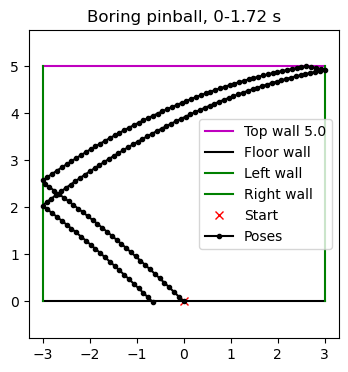

In [15]:
nrows = 1
ncols = 1
_, axs = plt.subplots(nrows, ncols, figsize=(4, 4))


# Pass the walls into the plot as a list
total_time = delta_t_bounce * ret_poses_bounce.shape[1]
plot_pinball_lab(axs, ret_poses_bounce, [top_wall, left_wall, right_wall], total_time)

In [16]:
# Manual grade
print("This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.")

This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.


<!-- END QUESTION -->

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [17]:

# List of names (creates a set)
worked_with_names = {"N/A"}
# List of URLS I25 (creates a set)
websites = {"N/A"}
# Approximate number of hours, including lab/in-class time
hours = 1.5

In [18]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

### To submit

Double check your plots. Don't forget **pinball_routines.py**. We will include **matrix_routines.py**; but it won't hurt if you include it as well.

- Submit this .ipynb file  and pinball_routines.py to lecture activity 9 (simulate)

If the Gradescope autograder fails, please check here first for common reasons for it to fail
    https://docs.google.com/presentation/d/1tYa5oycUiG4YhXUq5vHvPOpWJ4k_xUPp2rUNIL7Q9RI/edit?usp=sharing

Failures: See above for files to include.